In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Conv1D, Dense, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad
# from tensorflow.keras.callbacks import EarlyStopping


In [3]:
df = pd.read_csv("sensor-nodes.csv")
df.head(10)


,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-23 0:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-23 0:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-23 0:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-23 0:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-23 0:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0
5,6,01-02-23 0:05,192.168.230.20,42.539308,1.777329,1.226797,140.306629,-48.164891,22.562783,80.792853,...,3,9.100424,10.912167,17.039896,17.098904,0.095630,41.592922,37.011924,135.173141,0
6,7,01-02-23 0:06,192.168.201.178,34.371305,2.122728,1.238309,82.759149,-46.749541,22.199859,83.896476,...,5,5.514884,9.764031,14.729525,14.537270,0.112991,51.911647,33.413317,113.722314,0
7,8,01-02-23 0:07,192.168.0.73,39.421713,1.632756,1.070672,128.744279,-47.965449,22.017101,73.018853,...,3,8.785059,7.424502,14.028956,16.584326,0.150733,43.373535,32.514071,101.301618,0
8,9,01-02-23 0:08,192.168.35.14,64.392638,1.771348,0.614431,105.554913,-45.030005,19.406187,100.505321,...,4,9.652375,9.578266,20.649000,13.220874,0.133769,41.662683,36.024818,130.214575,0
9,10,01-02-23 0:09,192.168.94.186,71.586404,2.874885,1.175556,109.901877,-43.949902,27.354364,76.642262,...,3,8.413089,14.570255,15.308871,14.962364,0.088105,39.467362,31.086755,130.360976,0


In [4]:
X = df.drop(columns=['Node_ID', 'Timestamp', 'IP_Address', 'Is_Malicious'])
y = df['Is_Malicious']


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# LSTM
X_train_val_lstm, X_test_lstm, y_train_val_lstm, y_test_lstm = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(
    X_train_val_lstm, y_train_val_lstm, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train_lstm.shape)
print("Shape of X_val:", X_val_lstm.shape)
print("Shape of X_test:", X_test_lstm.shape)
print("Shape of y_train:", y_train_lstm.shape)
print("Shape of y_val:", y_val_lstm.shape)
print("Shape of y_test:", y_test_lstm.shape)


Shape of X_train: (6000, 17)
Shape of X_val: (2000, 17)
Shape of X_test: (2000, 17)
Shape of y_train: (6000,)
Shape of y_val: (2000,)
Shape of y_test: (2000,)


In [7]:
sequence_length = X_train_lstm.shape[1]
num_features = 1

X_train_reshaped_lstm = np.expand_dims(X_train_lstm, axis=-1)
X_val_reshaped_lstm = np.expand_dims(X_val_lstm, axis=-1)
X_test_reshaped_lstm = np.expand_dims(X_test_lstm, axis=-1)

print("Sequence length: ", sequence_length)
print("Num of features: ", num_features)


Sequence length:  17
Num of features:  1


In [8]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, input_shape=(sequence_length, num_features),
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
lstm_model.add(Dropout(0.5))


In [9]:
# Adam Optimizer
lstm_adam_optimizer = Adam(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_adam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_adam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                   epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 3s 7ms/step - loss: 0.4942 - accuracy: 0.1220 - val_loss: 0.0854 - val_accuracy: 0.0285
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3995 - accuracy: 0.3130 - val_loss: 0.0421 - val_accuracy: 0.0100
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3909 - accuracy: 0.4193 - val_loss: 0.0368 - val_accuracy: 0.0000e+00
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3895 - accuracy: 0.4282 - val_loss: 0.0301 - val_accuracy: 0.0000e+00
Epoch 5/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3875 - accuracy: 0.4285 - val_loss: 0.0276 - val_accuracy: 0.0000e+00
Epoch 6/30
188/188 [==============================] - 1s 7ms/step - loss: 0.3909 - accuracy: 0.4365 - val_loss: 0.0247 - val_accuracy: 0.0000e+00
Epoch 7/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3849 - accuracy: 0.4413 - val_loss: 0.0222 - val_accurac

In [10]:
lstm_nadam_optimizer = Nadam(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_nadam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_nadam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                    epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 3s 9ms/step - loss: 0.3848 - accuracy: 0.4657 - val_loss: 0.0109 - val_accuracy: 0.0000e+00
Epoch 2/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3826 - accuracy: 0.4617 - val_loss: 0.0086 - val_accuracy: 0.0000e+00
Epoch 3/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3837 - accuracy: 0.4773 - val_loss: 0.0171 - val_accuracy: 0.0000e+00
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3848 - accuracy: 0.4487 - val_loss: 0.0117 - val_accuracy: 0.0000e+00
Epoch 5/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3821 - accuracy: 0.4835 - val_loss: 0.0078 - val_accuracy: 0.0000e+00
Epoch 6/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3818 - accuracy: 0.4682 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 7/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3822 - accuracy: 0.4722 - val_loss: 0.0072 - val

In [11]:
lstm_adagrad_optimizer = Adagrad(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_adagrad_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_adagrad_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                      epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 3s 8ms/step - loss: 0.3879 - accuracy: 0.4647 - val_loss: 0.0205 - val_accuracy: 0.0010
Epoch 2/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3900 - accuracy: 0.4755 - val_loss: 0.0208 - val_accuracy: 5.0000e-04
Epoch 3/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3880 - accuracy: 0.4817 - val_loss: 0.0209 - val_accuracy: 5.0000e-04
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3810 - accuracy: 0.4742 - val_loss: 0.0209 - val_accuracy: 5.0000e-04
Epoch 5/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3875 - accuracy: 0.4755 - val_loss: 0.0210 - val_accuracy: 5.0000e-04
Epoch 6/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3861 - accuracy: 0.4712 - val_loss: 0.0210 - val_accuracy: 5.0000e-04
Epoch 7/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3895 - accuracy: 0.4667 - val_loss: 0.0209 - val_acc

In [12]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(
    X_test_reshaped_lstm, y_test_lstm)
print("Test LSTM Loss: ", lstm_loss)
print("Test LSTM Accuracy: ", lstm_accuracy)


63/63 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 5.0000e-04
Test LSTM Loss:  0.01850573718547821
Test LSTM Accuracy:  0.0005000000237487257


In [13]:
# GRU
X_train_gru, X_temp_gru, y_train_gru, y_temp_gru = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_val_gru, X_test_gru, y_val_gru, y_test_gru = train_test_split(
    X_temp_gru, y_temp_gru, test_size=0.5, random_state=42)

X_train_reshaped_gru = X_train_gru.reshape(-1, 1, X_train_gru.shape[1])
X_val_reshaped_gru = X_val_gru.reshape(-1, 1, X_val_gru.shape[1])
X_test_reshaped_gru = X_test_gru.reshape(-1, 1, X_test_gru.shape[1])


In [14]:
gru_model = Sequential()
gru_model.add(GRU(units=64, input_shape=(
    X_train_reshaped_gru.shape[1], X_train_reshaped_gru.shape[2]), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
gru_model.add(Dropout(0.5))


In [15]:
gru_adam_optimizer = Adam(learning_rate=0.001)
gru_model.compile(optimizer=gru_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                 batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 2s 4ms/step - loss: 0.6209 - accuracy: 0.0579 - val_loss: 0.1627 - val_accuracy: 0.0747
Epoch 2/30
219/219 [==============================] - 1s 4ms/step - loss: 0.4759 - accuracy: 0.1170 - val_loss: 0.1388 - val_accuracy: 0.0573
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4628 - accuracy: 0.1743 - val_loss: 0.1293 - val_accuracy: 0.0427
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.2103 - val_loss: 0.1234 - val_accuracy: 0.0307
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.2386 - val_loss: 0.1186 - val_accuracy: 0.0187
Epoch 6/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4467 - accuracy: 0.2609 - val_loss: 0.1160 - val_accuracy: 0.0133
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.2959 - val_loss: 0.1133 - val_accuracy: 0.0140
Epoch 

In [16]:
gru_nadam_optimizer = Nadam(learning_rate=0.001)
gru_model.compile(optimizer=gru_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_nadam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 3s 5ms/step - loss: 0.4363 - accuracy: 0.4371 - val_loss: 0.1026 - val_accuracy: 0.0053
Epoch 2/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4400 - accuracy: 0.4321 - val_loss: 0.1015 - val_accuracy: 0.0140
Epoch 3/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4404 - accuracy: 0.4407 - val_loss: 0.1025 - val_accuracy: 0.0060
Epoch 4/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4350 - accuracy: 0.4441 - val_loss: 0.1043 - val_accuracy: 0.0013
Epoch 5/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4357 - accuracy: 0.4440 - val_loss: 0.1014 - val_accuracy: 0.0000e+00
Epoch 6/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4368 - accuracy: 0.4389 - val_loss: 0.0999 - val_accuracy: 0.0207
Epoch 7/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4325 - accuracy: 0.4390 - val_loss: 0.0995 - val_accuracy: 0.0113
Ep

In [17]:
gru_adagrad_optimizer = Adagrad(learning_rate=0.001)
gru_model.compile(optimizer=gru_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adagrad_history = gru_model.fit(X_train_reshaped_gru, y_train_gru,
                                    epochs=30, batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30


219/219 [==============================] - 3s 5ms/step - loss: 0.4300 - accuracy: 0.4490 - val_loss: 0.1000 - val_accuracy: 0.0080
Epoch 2/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4365 - accuracy: 0.4514 - val_loss: 0.1000 - val_accuracy: 0.0080
Epoch 3/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4328 - accuracy: 0.4596 - val_loss: 0.0999 - val_accuracy: 0.0087
Epoch 4/30
219/219 [==============================] - 1s 4ms/step - loss: 0.4310 - accuracy: 0.4516 - val_loss: 0.0999 - val_accuracy: 0.0093
Epoch 5/30
219/219 [==============================] - 1s 4ms/step - loss: 0.4331 - accuracy: 0.4453 - val_loss: 0.0999 - val_accuracy: 0.0093
Epoch 6/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4354 - accuracy: 0.4481 - val_loss: 0.0999 - val_accuracy: 0.0093
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.4513 - val_loss: 0.0999 - val_accuracy: 0.0093
Epoch 8/30
219/21

In [18]:
gru_loss, gru_accuracy = gru_model.evaluate(X_test_reshaped_gru, y_test_gru)
print("Test GRU Loss: ", gru_loss)
print("Test GRU Accuracy: ", gru_accuracy)


47/47 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 0.0133
Test GRU Loss:  0.10601137578487396
Test GRU Accuracy:  0.013333333656191826


In [19]:
# CNN
X_train_cnn, X_temp_cnn, y_train_cnn, y_temp_cnn = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_val_cnn, X_test_cnn, y_val_cnn, y_test_cnn = train_test_split(
    X_temp_cnn, y_temp_cnn, test_size=0.5, random_state=42)

print("Shape of X_train:", X_train_cnn.shape)

sequence_length = X_train_cnn.shape[1]
num_features = 1

X_train_reshaped_cnn = X_train_cnn.reshape(-1, sequence_length, num_features)
X_val_reshaped_cnn = X_val_cnn.reshape(-1, sequence_length, num_features)
X_test_reshaped_cnn = X_test_cnn.reshape(-1, sequence_length, num_features)


Shape of X_train: (7000, 17)


In [20]:
cnn_model = Sequential()

cnn_model.add(Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(
    sequence_length, num_features), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(filters=32, kernel_size=3, activation="relu"))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation="relu"))

cnn_model.add(Dropout(0.5))


In [21]:
cnn_adam_optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                 batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.6056 - accuracy: 0.0089 - val_loss: 0.3208 - val_accuracy: 0.0353
Epoch 2/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5619 - accuracy: 0.3393 - val_loss: 0.2936 - val_accuracy: 0.4587
Epoch 3/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5485 - accuracy: 0.6054 - val_loss: 0.2835 - val_accuracy: 0.5620
Epoch 4/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5418 - accuracy: 0.7626 - val_loss: 0.2613 - val_accuracy: 0.8427
Epoch 5/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5361 - accuracy: 0.8470 - val_loss: 0.2479 - val_accuracy: 0.8153
Epoch 6/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5292 - accuracy: 0.8914 - val_loss: 0.2429 - val_accuracy: 0.8580
Epoch 7/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5264 - accuracy: 0.9069 - val_loss: 0.2400 - val_accuracy: 0.9100
Epoch 

In [22]:
cnn_nadam_optimizer = Nadam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_nadam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4746 - accuracy: 0.9276 - val_loss: 0.1611 - val_accuracy: 0.9133
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.9377 - val_loss: 0.1627 - val_accuracy: 0.9533
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.9409 - val_loss: 0.1638 - val_accuracy: 0.9533
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.9427 - val_loss: 0.1623 - val_accuracy: 0.9547
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4770 - accuracy: 0.9420 - val_loss: 0.1607 - val_accuracy: 0.9520
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.9436 - val_loss: 0.1588 - val_accuracy: 0.9547
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.9473 - val_loss: 0.1589 - val_accuracy: 0.9547
Epoch 

In [23]:
cnn_adagrad_optimizer = Adagrad(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adagrad_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                    batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 4ms/step - loss: 0.4749 - accuracy: 0.9494 - val_loss: 0.1567 - val_accuracy: 0.9540
Epoch 2/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4752 - accuracy: 0.9496 - val_loss: 0.1568 - val_accuracy: 0.9547
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.9497 - val_loss: 0.1569 - val_accuracy: 0.9547
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.9499 - val_loss: 0.1571 - val_accuracy: 0.9547
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.9499 - val_loss: 0.1572 - val_accuracy: 0.9547
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.9499 - val_loss: 0.1572 - val_accuracy: 0.9547
Epoch 7/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4745 - accuracy: 0.9499 - val_loss: 0.1573 - val_accuracy: 0.9547
Epoch 

In [24]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped_cnn, y_test_cnn)
print("Test CNN Loss: ", cnn_loss)
print("Test CNN Accuracy: ", cnn_accuracy)


47/47 [==============================] - 0s 1ms/step - loss: 0.1661 - accuracy: 0.9520
Test CNN Loss:  0.16606391966342926
Test CNN Accuracy:  0.9520000219345093


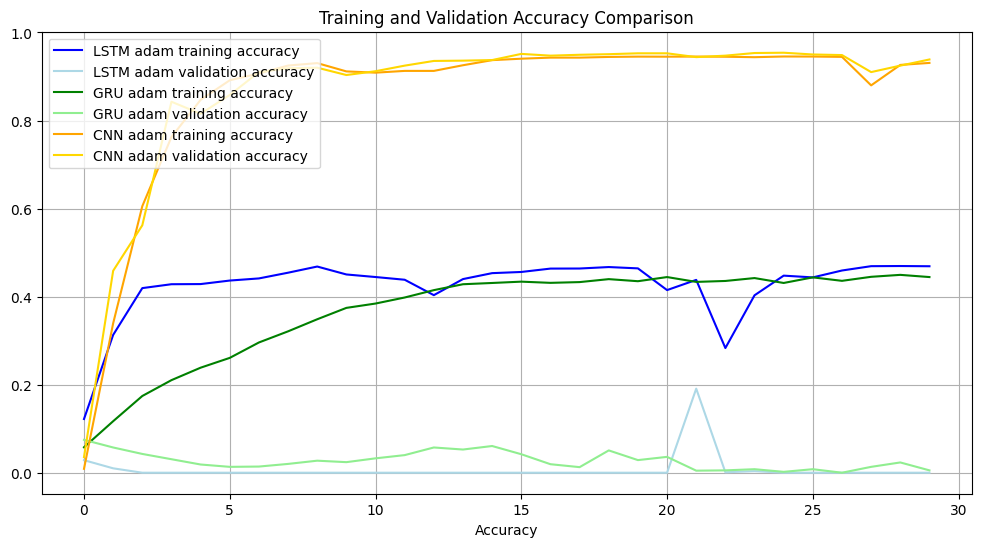

In [25]:
plt.figure(figsize=(12, 6))

plt.plot(lstm_adam_history.history["accuracy"],
         label="LSTM adam training accuracy", color='blue')
plt.plot(lstm_adam_history.history["val_accuracy"],
         label="LSTM adam validation accuracy", color='lightblue')

plt.plot(gru_adam_history.history["accuracy"],
         label="GRU adam training accuracy", color='green')
plt.plot(gru_adam_history.history["val_accuracy"],
         label="GRU adam validation accuracy", color='lightgreen')

plt.plot(cnn_adam_history.history["accuracy"],
         label="CNN adam training accuracy", color='orange')
plt.plot(cnn_adam_history.history["val_accuracy"],
         label="CNN adam validation accuracy", color='gold')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.xlabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


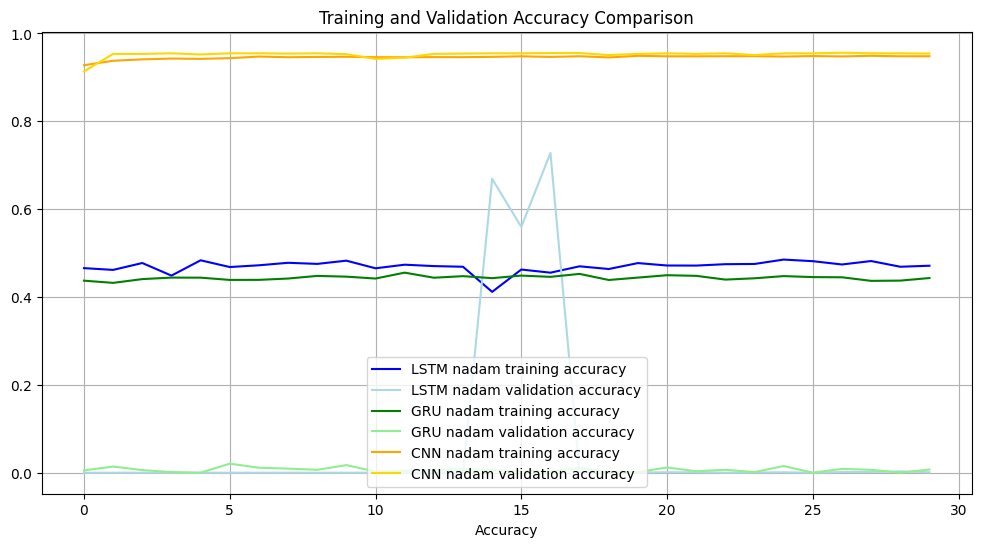

In [26]:
plt.figure(figsize=(12, 6))

plt.plot(lstm_nadam_history.history["accuracy"],
         label="LSTM nadam training accuracy", color='blue')
plt.plot(lstm_nadam_history.history["val_accuracy"],
         label="LSTM nadam validation accuracy", color='lightblue')

plt.plot(gru_nadam_history.history["accuracy"],
         label="GRU nadam training accuracy", color='green')
plt.plot(gru_nadam_history.history["val_accuracy"],
         label="GRU nadam validation accuracy", color='lightgreen')

plt.plot(cnn_nadam_history.history["accuracy"],
         label="CNN nadam training accuracy", color='orange')
plt.plot(cnn_nadam_history.history["val_accuracy"],
         label="CNN nadam validation accuracy", color='gold')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.xlabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


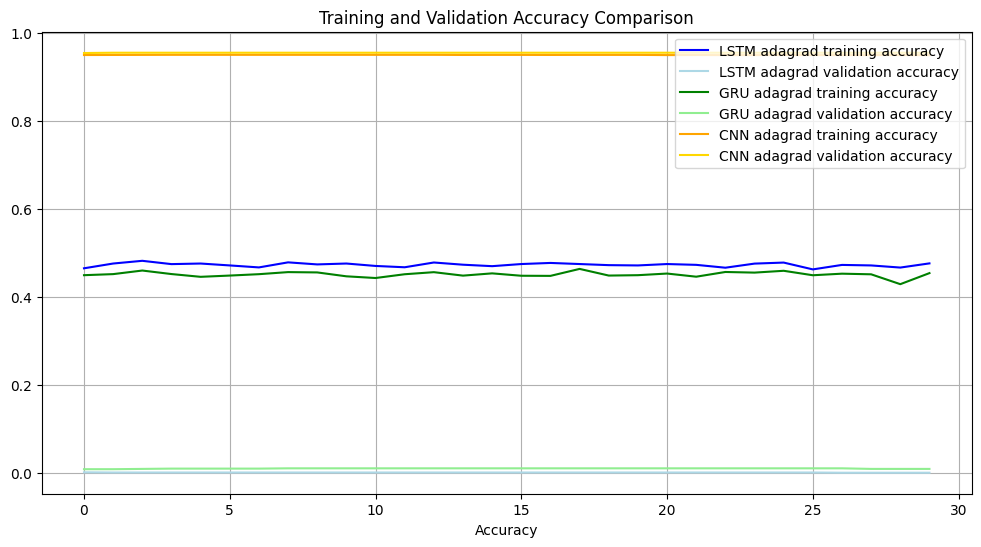

In [29]:
plt.figure(figsize=(12, 6))

plt.plot(lstm_adagrad_history.history["accuracy"],
         label="LSTM adagrad training accuracy", color='blue')
plt.plot(lstm_adagrad_history.history["val_accuracy"],
         label="LSTM adagrad validation accuracy", color='lightblue')

plt.plot(gru_adagrad_history.history["accuracy"],
         label="GRU adagrad training accuracy", color='green')
plt.plot(gru_adagrad_history.history["val_accuracy"],
         label="GRU adagrad validation accuracy", color='lightgreen')

plt.plot(cnn_adagrad_history.history["accuracy"],
         label="CNN adagrad training accuracy", color='orange')
plt.plot(cnn_adagrad_history.history["val_accuracy"],
         label="CNN adagrad validation accuracy", color='gold')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.xlabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


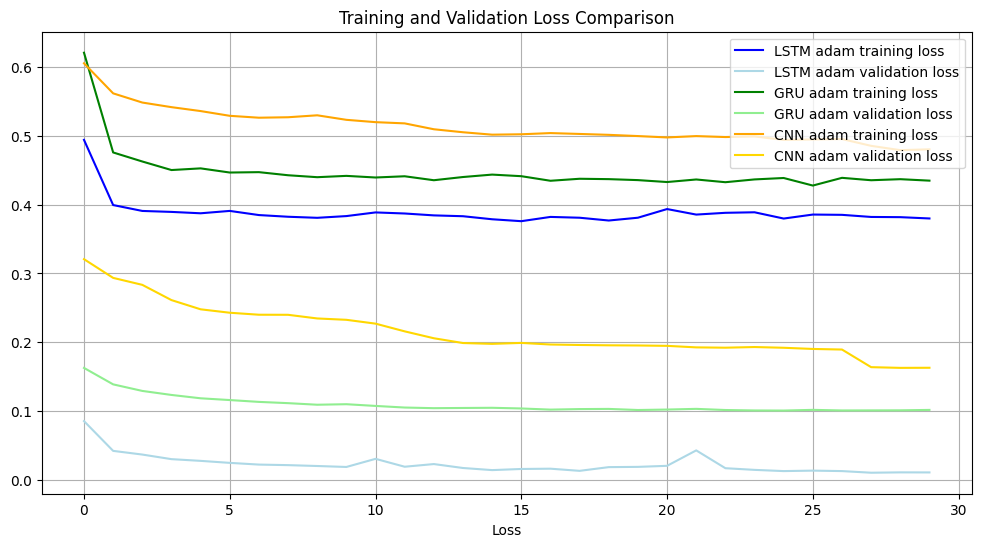

In [30]:
plt.figure(figsize=(12, 6))

plt.plot(lstm_adam_history.history["loss"],
         label="LSTM adam training loss", color='blue')
plt.plot(lstm_adam_history.history["val_loss"],
         label="LSTM adam validation loss", color='lightblue')

plt.plot(gru_adam_history.history["loss"],
         label="GRU adam training loss", color='green')
plt.plot(gru_adam_history.history["val_loss"],
         label="GRU adam validation loss", color='lightgreen')

plt.plot(cnn_adam_history.history["loss"],
         label="CNN adam training loss", color='orange')
plt.plot(cnn_adam_history.history["val_loss"],
         label="CNN adam validation loss", color='gold')

plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epoch')
plt.xlabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
